<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A9%E1%84%8E%E1%85%B5_%EB%B9%A0%EB%A5%B8%EC%8B%9C%EC%9E%91_%EB%94%B0%EB%9D%BC%ED%95%98%EA%B8%B0!_%ED%95%9C%EA%B5%AD_%EC%82%AC%EC%9A%A9%EC%9E%90_%EB%AA%A8%EC%9E%84_%EA%B3%B5%EC%8B%9D%EB%AC%B8%EC%84%9C_%EB%B2%88%EC%97%AD%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17005357.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 261312.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5001261.96it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5218046.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [7]:
X[0].shape

torch.Size([1, 28, 28])

In [17]:
np.unique(y.numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 1.0, 'tensor(2)')

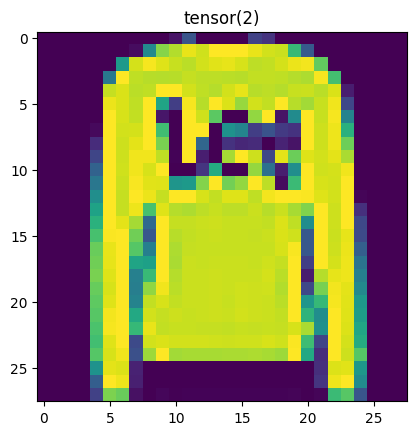

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X[1].squeeze().numpy())
plt.title(y[1])

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.flatten = nn.Flatten()
      self.linear_relu_stack = nn.Sequential(
          nn.Linear(in_features=28*28, out_features=512),
          nn.ReLU(),
          nn.Linear(512, 512),
          nn.ReLU(),
          nn.Linear(512, 10),
      )

    def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [25]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(),batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:5d}]")

In [26]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [27]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n---------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print("Done")

Epoch 1
---------------------
loss: 2.296436 [    0/60000]
loss: 2.292943 [ 6400/60000]
loss: 2.270778 [12800/60000]
loss: 2.266901 [19200/60000]
loss: 2.256373 [25600/60000]
loss: 2.221524 [32000/60000]
loss: 2.232305 [38400/60000]
loss: 2.204057 [44800/60000]
loss: 2.194795 [51200/60000]
loss: 2.166990 [57600/60000]
Test Error: 
 Accuracy: 42.4%, Avg loss: 2.165059 

Epoch 2
---------------------
loss: 2.172376 [    0/60000]
loss: 2.175080 [ 6400/60000]
loss: 2.116319 [12800/60000]
loss: 2.133940 [19200/60000]
loss: 2.099059 [25600/60000]
loss: 2.031557 [32000/60000]
loss: 2.063226 [38400/60000]
loss: 1.991897 [44800/60000]
loss: 1.985944 [51200/60000]
loss: 1.929466 [57600/60000]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.926175 

Epoch 3
---------------------
loss: 1.952165 [    0/60000]
loss: 1.939423 [ 6400/60000]
loss: 1.817578 [12800/60000]
loss: 1.858031 [19200/60000]
loss: 1.769677 [25600/60000]
loss: 1.707872 [32000/60000]
loss: 1.727996 [38400/60000]
loss: 1.626857 [44800/6

In [28]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [29]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [32]:
classes = [
    "T_shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y= test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}')

Predicted: "Ankle boot", Actual: "Ankle boot
